# Smart Quality Monitoring Dashboard
This notebook performs an analysis of simulated quality control data from a manufacturing process. The goal is to uncover insights that can improve defect detection, machine performance, and overall product quality.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Load the dataset
file_path = 'simulated_quality_data.csv'
df = pd.read_csv(file_path)
df['Inspection DateTime'] = pd.to_datetime(df['Inspection DateTime'])
df['Date'] = df['Inspection DateTime'].dt.date

df.head()

,Inspection DateTime,Machine ID,Operator,Defect Type,Result,Inspection Duration (min),Date
0,2025-03-13 21:16:00,M-101,Ana,Color inconsistency,Rejected,6.39,2025-03-13
1,2025-03-04 20:58:00,M-104,Ana,No defect,Approved,3.00,2025-03-04
2,2025-03-22 01:35:00,M-101,Ana,Diameter issue,Rejected,2.24,2025-03-22
3,2025-03-19 19:31:00,M-101,Ana,Color inconsistency,Rejected,3.73,2025-03-19
4,2025-03-16 19:56:00,M-102,Sara,Surface flaw,Rejected,4.50,2025-03-16


## Rejection Rate by Machine
Identify which machines have higher rejection rates.

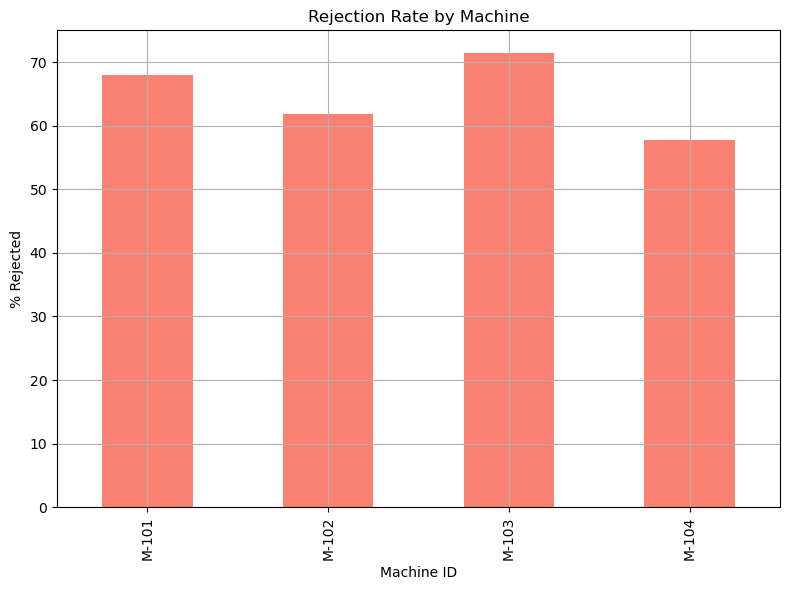

In [3]:
machine_defect_rate = df.groupby('Machine ID')['Result'].value_counts(normalize=True).unstack().fillna(0) * 100
plt.figure(figsize=(8, 6))
machine_defect_rate['Rejected'].plot(kind='bar', color='salmon')
plt.title('Rejection Rate by Machine')
plt.ylabel('% Rejected')
plt.xlabel('Machine ID')
plt.grid(True)
plt.tight_layout()
plt.show()

## Most Common Defect Types
See which types of defects are most frequent in the process.

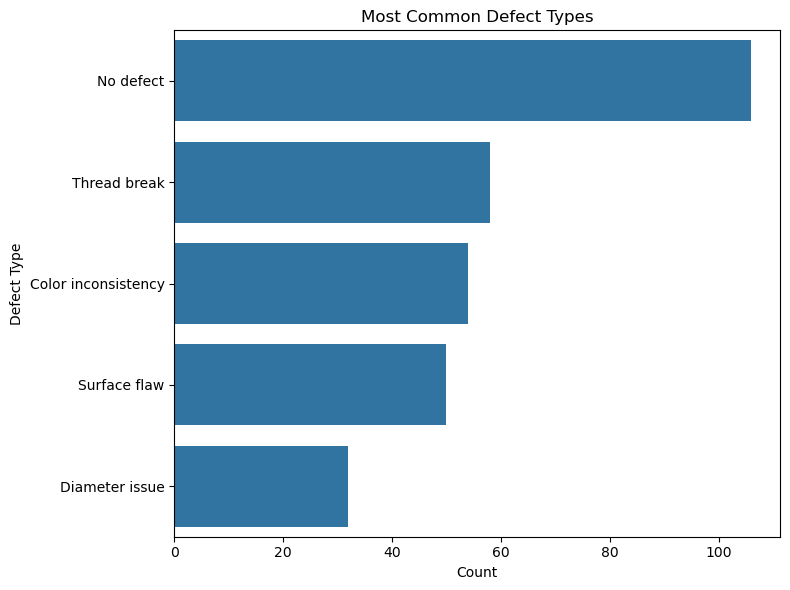

In [4]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, y='Defect Type', order=df['Defect Type'].value_counts().index)
plt.title('Most Common Defect Types')
plt.xlabel('Count')
plt.ylabel('Defect Type')
plt.tight_layout()
plt.show()

## Inspections per Operator
Evaluate workload distribution among staff.

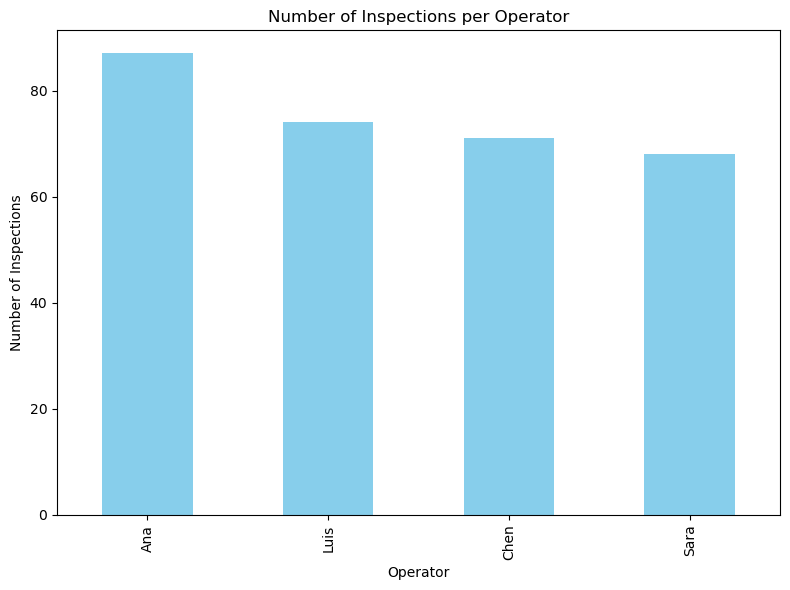

In [5]:
operator_inspections = df['Operator'].value_counts()
plt.figure(figsize=(8, 6))
operator_inspections.plot(kind='bar', color='skyblue')
plt.title('Number of Inspections per Operator')
plt.xlabel('Operator')
plt.ylabel('Number of Inspections')
plt.tight_layout()
plt.show()

## Conclusions
- Machines with high rejection rates may need maintenance.
- Frequent defect types should be addressed with targeted improvements.
- Inspection workload should be monitored for fair distribution and performance assessment.

This kind of analysis can support better decision-making in quality control and manufacturing efficiency.